In [101]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
path = "/Users/gumuhan/Documents/Courses/SYDE675/RecSys/dating/SpeedDatingData.csv"
dt = pd.read_csv(path, encoding = "gbk")
dt

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [73]:
set(dt.wave)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}

In [12]:
from IPython.display import SVG

import numpy as np
from scipy import sparse
import pandas as pd

from sknetwork.utils import edgelist2adjacency, edgelist2biadjacency
from sknetwork.data import convert_edge_list, load_edge_list, load_graphml
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

In [13]:
# toy example
adjacency = np.array([[0, 1, 1, 0], [1, 0, 1, 1], [1, 1, 0, 0], [0, 1, 0, 0]])
adjacency = sparse.csr_matrix(adjacency)
adjacency

<4x4 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

## Small try

In [74]:
sdt = dt[dt.wave == 1][['iid', 'pid', 'dec_o']].dropna()
sdt

,iid,pid,dec_o
0,1,11.0,0
1,1,12.0,0
2,1,13.0,1
3,1,14.0,1
4,1,15.0,1
...,...,...,...
195,20,6.0,1
196,20,7.0,1
197,20,8.0,1
198,20,9.0,1


In [62]:
sdt.query('id == 1.0 & pid == 11.0')

,id,pid,dec_o
0,1.0,11.0,0


In [146]:
ssdt= sdt[sdt.dec_o==1]
ssdt = ssdt.astype({"iid":"int","pid":"int"})
ssdt

,iid,pid,dec_o
2,1,13,1
3,1,14,1
4,1,15,1
5,1,16,1
8,1,19,1
...,...,...,...
195,20,6,1
196,20,7,1
197,20,8,1
198,20,9,1


In [147]:
sdt.shape[0]
ssdt.iid.unique()
len(ssdt.iid.unique())

200

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

20

In [148]:
# get transition matrix
m = len(ssdt.iid.unique())
tm = np.zeros((m, m))
for i in ssdt.iid.unique():
    for j in ssdt[ssdt.iid == i].pid:
        tm[j-1][i-1] = 1
tm

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
        1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
        1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0.

In [149]:
s = 0
for i in range(len(tm)):
    s += sum(tm[i])
print(s)

111.0


In [29]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.ranking import PageRank
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph

In [150]:
# PageRank
pagerank = PageRank()
scores = pagerank.fit_transform(tm)
scores

array([0.0292789 , 0.03730425, 0.07363335, 0.05551063, 0.02361846,
       0.0292789 , 0.04653729, 0.11356409, 0.06474368, 0.02626939,
       0.07555178, 0.03119733, 0.03269321, 0.06966161, 0.02687208,
       0.02711737, 0.05908482, 0.02711737, 0.07548275, 0.07548275])

In [151]:
np.sort(scores)

array([0.02361846, 0.02626939, 0.02687208, 0.02711737, 0.02711737,
       0.0292789 , 0.0292789 , 0.03119733, 0.03269321, 0.03730425,
       0.04653729, 0.05551063, 0.05908482, 0.06474368, 0.06966161,
       0.07363335, 0.07548275, 0.07548275, 0.07555178, 0.11356409])

In [153]:
np.argsort(scores)

array([ 4,  9, 14, 17, 15,  0,  5, 11, 12,  1,  6,  3, 16,  8, 13,  2, 18,
       19, 10,  7])

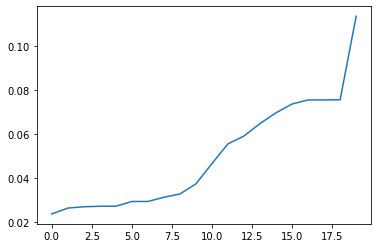

In [152]:
plt.plot(np.sort(scores))

## PageRank -- Transition Matrix by Wave

wave:  1
scores: [0.0292789  0.03730425 0.07363335 0.05551063 0.02361846 0.0292789
 0.04653729 0.11356409 0.06474368 0.02626939 0.07555178 0.03119733
 0.03269321 0.06966161 0.02687208 0.02711737 0.05908482 0.02711737
 0.07548275 0.07548275]
wave:  2
scores: [0.00638792 0.00638792 0.01335824 0.02551071 0.07393797 0.07894036
 0.05143214 0.02514605 0.01034524 0.01290964 0.04799907 0.06024491
 0.0107289  0.0413623  0.03657195 0.02066115 0.00719844 0.02845722
 0.00565684 0.04099986 0.00485439 0.01097294 0.00917519 0.00918951
 0.01273674 0.07730864 0.0055363  0.03267419 0.06098065 0.06162674
 0.02551077 0.00944611 0.04220124 0.00485439 0.02869536]
wave:  3
scores: [0.12964165 0.01363271 0.03927509 0.05116971 0.01239238 0.01363271
 0.16172859 0.02254784 0.0277958  0.0750788  0.01794664 0.07064819
 0.01868105 0.11618538 0.05353043 0.02516333 0.01420059 0.05575963
 0.06579435 0.01519512]
wave:  4
scores: [0.01730016 0.02828056 0.01493147 0.03264776 0.00893364 0.042746
 0.02981308 0.03834635 0.0

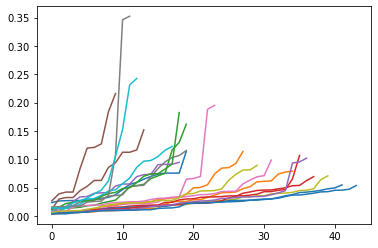

In [158]:
# 
def tm_by_wave(w):
    print("wave: ", w)
    
    # attributes are: iid, pid, dec_o
    sdt = dt[dt.wave == w][['iid', 'pid', 'dec_o']].dropna()
    s1 = sdt[sdt.dec_o==1]
    s1 = s1.astype({"iid":"int","pid":"int"})
    
    # get transition matrix
    iid_arr = sdt.iid.unique()
    m = len(iid_arr) # matrix m by m
    
    # min of unique iid -- n
    n = min(iid_arr) 
    tm = np.zeros((m, m)) # initialize
    for i in iid_arr:
        try:
            # only consider entries with 1
            tm_pid = s1[s1.iid == i].pid
            for j in tm_pid:
                #print(i-n, j-n2)
                tm[j-n][i-n] = 1
        except:
            continue
    
    return tm, iid_arr

def page_rank(w):
    tm, iid_arr = tm_by_wave(w)
    
    # PageRank
    pagerank = PageRank()
    scores = pagerank.fit_transform(tm)
    print("scores:", scores)
    plt.plot(np.sort(scores))
    
    sort_indices = np.argsort(scores)[::-1]
    #print(sort_indices)
    r_score = [scores[i] for i in sort_indices]
#     ranked_iid = iid_arr[sort_indices]
#     for i in range(len(sort_indices)):
#         sort_indices[i] = len(sort_indices) - sort_indices[i]
    r_iid = [iid_arr[i] for i in sort_indices]   
    
    return r_iid, r_score, list(range(1, len(r_iid)+1)) # rank  --- 改 

def page_rank_all_to_csv():
    file_name = "page_rank_by_wave.csv"
    df_res = pd.DataFrame(columns=['wave', 'rank_in_wave', 'pr_score', 'iid'])
    
    for w in dt.wave.unique():
        iid_arr, scores, rank = page_rank(w)
        df_new = pd.DataFrame(zip([w]*len(rank), rank, scores, iid_arr),
                              columns=['wave', 'rank_in_wave', 'pr_score', 'iid'])
        df_res = df_res.append(df_new)
    df_res.to_csv(file_name, index=False)
        
page_rank_all_to_csv()

## Join this csv with the whole

In [159]:
df_s = pd.read_csv('/Users/gumuhan/Documents/Courses/SYDE675/coding for recsys/page_rank_by_wave.csv')
df_b = df_s.merge(i_df.drop(columns = ['wave']), on='iid')
df_b

,wave,rank_in_wave,pr_score,iid,gender,idg,condtn,round,age,field,...,positin1,position,prob,prob_o,race_o,samerace,shar,shar_o,sinc,sinc_o
0,1,1,0.113564,8,0,15,1,10,25.0,Masters in Public Administration,...,NaN,10.0,5.0,4.0,2.0,1.0,5.0,5.0,8.0,7.0
1,1,2,0.075552,11,1,2,1,10,27.0,Finance,...,NaN,7.0,4.0,6.0,4.0,0.0,6.0,5.0,8.0,9.0
2,1,3,0.075483,20,1,20,1,10,24.0,Finance,...,NaN,7.0,6.0,6.0,4.0,0.0,6.0,8.0,6.0,6.0
3,1,4,0.075483,19,1,18,1,10,28.0,money,...,NaN,7.0,8.0,7.0,4.0,0.0,9.0,8.0,7.0,6.0
4,1,5,0.073633,3,0,5,1,10,25.0,Economics,...,NaN,9.0,7.0,2.0,2.0,1.0,9.0,4.0,9.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,21,40,0.006226,530,0,43,2,22,22.0,Mechanical Engineering,...,2.0,2.0,6.0,3.0,4.0,1.0,5.0,1.0,7.0,10.0
547,21,41,0.005805,523,0,29,2,22,27.0,Education,...,5.0,5.0,5.0,1.0,4.0,1.0,6.0,1.0,5.0,10.0
548,21,42,0.005441,529,0,41,2,22,22.0,Engineering,...,3.0,3.0,7.0,3.0,4.0,1.0,5.0,8.0,6.0,10.0
549,21,43,0.005240,526,0,35,2,22,26.0,Social Work,...,14.0,14.0,1.0,1.0,4.0,0.0,5.0,5.0,3.0,10.0


In [160]:
df_b.to_csv('PageRank_with_individual_attributes.csv', index=False)

In [202]:
# with popular attributes added
df_i_pop = df_s.merge(i_all.drop(columns = ['wave']), on='iid')
df_i_pop
df_i_pop.to_csv('PageRank_with_ext_attributes.csv', index=False)

,wave,rank_in_wave,pr_score,iid,#dec_0,percent_dec_0,av_like_o,gender,idg,condtn,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1,0.113564,8,8,0.800000,7.700000,0,15,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.075552,11,4,0.400000,6.200000,1,2,1,...,7.0,8.0,7.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN
2,1,3,0.075483,20,9,0.900000,8.300000,1,20,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,0.075483,19,9,0.900000,7.600000,1,18,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,0.073633,3,5,0.500000,6.000000,0,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,21,40,0.006226,530,3,0.136364,5.000000,0,43,2,...,6.0,9.0,5.0,7.0,5.0,3.0,8.0,8.0,5.0,5.0
547,21,41,0.005805,523,2,0.090909,5.454545,0,29,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
548,21,42,0.005441,529,3,0.136364,5.476190,0,41,2,...,6.0,10.0,7.0,8.0,7.0,6.0,9.0,7.0,8.0,8.0
549,21,43,0.005240,526,3,0.136364,5.333333,0,35,2,...,4.0,3.0,3.0,7.0,7.0,2.0,4.0,4.0,7.0,7.0


### Test PR using LR

In [196]:
import statsmodels.api as sm
Y = df_i_pop.pr_score
X = df_i_pop[['#dec_0', "percent_dec_0", "av_like_o"]]
#X
mod = sm.OLS(Y, X)
fii = mod.fit()
p_values = fii.summary2()#.tables[1]['P>|t|']
p_values
fii.summary2().tables[1]['P>|t|']

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.762     
Dependent Variable:     pr_score         AIC:                         -2437.7405
Date:                   2022-04-26 10:53 BIC:                         -2424.8053
No. Observations:       551              Log-Likelihood:              1221.9    
Df Model:               3                F-statistic:                 590.0     
Df Residuals:           548              Prob (F-statistic):          3.92e-171 
R-squared (uncentered): 0.764            Scale:                       0.00069784
-----------------------------------------------------------------------------------
                     Coef.     Std.Err.       t        P>|t|      [0.025     0.975]
-----------------------------------------------------------------------------------
#dec_0              -0.0070      0.0005    -15.2901    0.0000    -0.0079    -0.0061
percent_dec_0        0.1909      0.0086     22.1580    0.0000     0.1739     0.2078
av_like_o            0.0003      0.0005      0.6274    0.5307    -0.0006     0.0012
--------------------------------------------------------------------------------
Omnibus:                  416.609           Durbin-Watson:              1.132   
Prob(Omnibus):            0.000             Jarque-Bera (JB):           9947.623
Skew:                     3.061             Prob(JB):                   0.000   
Kurtosis:                 22.895            Condition No.:              73      
================================================================================

"""

#dec_0           3.253650e-44
percent_dec_0    3.715520e-78
av_like_o        5.306594e-01
Name: P>|t|, dtype: float64

In [197]:
import statsmodels.api as sm
Y = df_i_pop.pr_score
X = df_i_pop[["av_like_o"]]
#X
mod = sm.OLS(Y, X)
fii = mod.fit()
p_values = fii.summary2()#.tables[1]['P>|t|']
p_values
fii.summary2().tables[1]['P>|t|']

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.550     
Dependent Variable:     pr_score         AIC:                         -2087.7153
Date:                   2022-04-26 11:08 BIC:                         -2083.4036
No. Observations:       551              Log-Likelihood:              1044.9    
Df Model:               1                F-statistic:                 673.7     
Df Residuals:           550              Prob (F-statistic):          1.41e-97  
R-squared (uncentered): 0.551            Scale:                       0.0013220 
-------------------------------------------------------------------------------------
                Coef.       Std.Err.         t         P>|t|       [0.025      0.975]
-------------------------------------------------------------------------------------
av_like_o       0.0065        0.0002      25.9556      0.0000      0.0060      0.0069
--------------------------------------------------------------------------------
Omnibus:                 486.487           Durbin-Watson:              0.694    
Prob(Omnibus):           0.000             Jarque-Bera (JB):           13018.392
Skew:                    3.852             Prob(JB):                   0.000    
Kurtosis:                25.532            Condition No.:              1        
================================================================================

"""

av_like_o    1.413121e-97
Name: P>|t|, dtype: float64

In [ ]:
df_b.to_csv('PageRank_with_individual_attributes.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

## Select Only Personal Related Attributes in whole dataset 

In [130]:
#interesting_cols=['iid', 'gender', 'wave', 'round', 'condtn', 'position', ]
i_cols = list(dt.columns)
#print(i_cols)
for i in dt.iid.unique():
    sub = dt[dt.iid == i]
    #print(sub)
    for j in i_cols:
        if len(sub[j].unique()) > 1:
            i_cols.remove(j)
print(len(i_cols))
#print(i_cols)
dt[i_cols]

158


,iid,gender,idg,condtn,wave,round,age,field,field_cd,undergra,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,0,1,1,1,10,21.0,Law,1.0,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,0,1,1,1,10,21.0,Law,1.0,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,0,1,1,1,10,21.0,Law,1.0,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,0,1,1,1,10,21.0,Law,1.0,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,0,1,1,1,10,21.0,Law,1.0,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,1,44,2,21,22,25.0,Climate Dynamics,18.0,"Ecole Normale Sup巖ieure, Paris",...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,1,44,2,21,22,25.0,Climate Dynamics,18.0,"Ecole Normale Sup巖ieure, Paris",...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,1,44,2,21,22,25.0,Climate Dynamics,18.0,"Ecole Normale Sup巖ieure, Paris",...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,1,44,2,21,22,25.0,Climate Dynamics,18.0,"Ecole Normale Sup巖ieure, Paris",...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [198]:
i_df = pd.DataFrame(columns=i_cols)
for i in dt.iid.unique():
    i_df = i_df.append(dt[i_cols][dt.iid == i].iloc[0,])
print(i_df)

      iid gender idg condtn wave round   age                       field  \
0       1      0   1      1    1    10  21.0                         Law   
10      2      0   3      1    1    10  24.0                         law   
20      3      0   5      1    1    10  25.0                   Economics   
30      4      0   7      1    1    10  23.0                         Law   
40      5      0   9      1    1    10  21.0                         Law   
...   ...    ...  ..    ...  ...   ...   ...                         ...   
8268  548      1  36      2   21    22  30.0                    Business   
8290  549      1  38      2   21    22  28.0  General management/finance   
8312  550      1  40      2   21    22  30.0                         MBA   
8334  551      1  42      2   21    22  27.0                    Business   
8356  552      1  44      2   21    22  25.0            Climate Dynamics   

      field_cd                        undergra  ... attr3_3 sinc3_3  intel3_3  \
0     

In [199]:
i_df

,iid,gender,idg,condtn,wave,round,age,field,field_cd,undergra,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,0,1,1,1,10,21.0,Law,1.0,NaN,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
10,2,0,3,1,1,10,24.0,law,1.0,NaN,...,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN
20,3,0,5,1,1,10,25.0,Economics,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,4,0,7,1,1,10,23.0,Law,1.0,NaN,...,6.0,5.0,6.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN
40,5,0,9,1,1,10,21.0,Law,1.0,NaN,...,4.0,5.0,10.0,6.0,10.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8268,548,1,36,2,21,22,30.0,Business,8.0,"University of Cologne, Germany",...,8.0,9.0,9.0,9.0,9.0,8.0,9.0,9.0,9.0,7.0
8290,549,1,38,2,21,22,28.0,General management/finance,8.0,"LUISS, Rome",...,7.0,9.0,8.0,7.0,8.0,5.0,8.0,8.0,6.0,8.0
8312,550,1,40,2,21,22,30.0,MBA,8.0,Oxford,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8334,551,1,42,2,21,22,27.0,Business,8.0,Harvard,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
i_df.to_csv('dating_individual_attributes.csv', index=False)

## Get individual popularity

In [162]:
i_dec_o = dt.groupby('iid')['dec_o'].sum()
i_dec_o

iid
1       5
2       6
3       5
4       6
5       3
       ..
548    10
549    10
550     6
551    10
552    15
Name: dec_o, Length: 551, dtype: int64

In [180]:
len(i_dec_o)
sum(i_dec_o)

551

3515

In [181]:
dt.groupby('iid')['dec_o'].mean()

iid
1      0.500000
2      0.600000
3      0.500000
4      0.600000
5      0.300000
         ...   
548    0.454545
549    0.454545
550    0.272727
551    0.454545
552    0.681818
Name: dec_o, Length: 551, dtype: float64

In [182]:
dt.groupby('iid')['like_o'].mean()

iid
1      6.850000
2      7.600000
3      6.000000
4      7.300000
5      6.100000
         ...   
548    5.428571
549    5.850000
550    4.636364
551    5.952381
552    5.900000
Name: like_o, Length: 551, dtype: float64

In [176]:
# i_pop = pd.DataFrame({'iid': list(range(1, 118)) + list(range(119, 553)),
#                       '#dec_0': dt.groupby('iid')['dec_o'].sum(),
#                       'percent_dec_0': dt.groupby('iid')['dec_o'].mean(),
#                       'av_like_o': dt.groupby('iid')['like_o'].mean()}, index=range(0, 551))
# i_pop

,iid,#dec_0,percent_dec_0,av_like_o
0,1,NaN,NaN,NaN
1,2,5.0,0.500000,6.850000
2,3,6.0,0.600000,7.600000
3,4,5.0,0.500000,6.000000
4,5,6.0,0.600000,7.300000
...,...,...,...,...
546,548,12.0,0.545455,6.523810
547,549,11.0,0.500000,5.636364
548,550,10.0,0.454545,5.428571
549,551,10.0,0.454545,5.850000


In [184]:
i_pop = pd.DataFrame(zip(list(range(1, 118)) + list(range(119, 553)), 
                       dt.groupby('iid')['dec_o'].sum(),
                       dt.groupby('iid')['dec_o'].mean(),
                       dt.groupby('iid')['like_o'].mean()),
                   columns=['iid', '#dec_0', 'percent_dec_0', 'av_like_o'])
i_pop

,iid,#dec_0,percent_dec_0,av_like_o
0,1,5,0.500000,6.850000
1,2,6,0.600000,7.600000
2,3,5,0.500000,6.000000
3,4,6,0.600000,7.300000
4,5,3,0.300000,6.100000
...,...,...,...,...
546,548,10,0.454545,5.428571
547,549,10,0.454545,5.850000
548,550,6,0.272727,4.636364
549,551,10,0.454545,5.952381


In [201]:
i_all = i_pop.merge(i_df, on='iid')
i_all.to_csv('individual_all.csv', index=False)
i_all

,iid,#dec_0,percent_dec_0,av_like_o,gender,idg,condtn,wave,round,age,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,5,0.500000,6.850000,0,1,1,1,10,21.0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,2,6,0.600000,7.600000,0,3,1,1,10,24.0,...,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN
2,3,5,0.500000,6.000000,0,5,1,1,10,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6,0.600000,7.300000,0,7,1,1,10,23.0,...,6.0,5.0,6.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN
4,5,3,0.300000,6.100000,0,9,1,1,10,21.0,...,4.0,5.0,10.0,6.0,10.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,548,10,0.454545,5.428571,1,36,2,21,22,30.0,...,8.0,9.0,9.0,9.0,9.0,8.0,9.0,9.0,9.0,7.0
547,549,10,0.454545,5.850000,1,38,2,21,22,28.0,...,7.0,9.0,8.0,7.0,8.0,5.0,8.0,8.0,6.0,8.0
548,550,6,0.272727,4.636364,1,40,2,21,22,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
549,551,10,0.454545,5.952381,1,42,2,21,22,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [170]:
for i in range(1, 553):
    if i not in dt.iid.unique():
        print(i)

118


## Older trials

In [107]:
a = [1,2,4]
np.argsort(a)
a[]

array([0, 1, 2])

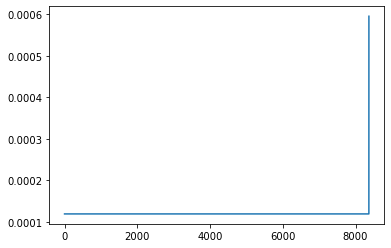

In [51]:
from scipy import sparse
>>> from fast_pagerank import pagerank
>>> from fast_pagerank import pagerank_power
>>> A = tm
>>> weights = [1]*sdt.shape[0]
>>> G = sparse.csr_matrix((weights, (A[:,0], A[:,1])), shape=(sdt.shape[0], sdt.shape[0]))
>>> pr=pagerank(G, p=0.8)
>>> pr
plt.plot(np.sort(pr))

8368.0


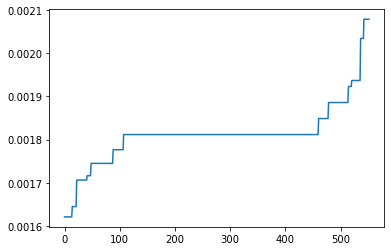

In [99]:
def get_tm():
    sdt = dt[['iid', 'pid', 'dec_o']].dropna()
    sdt = sdt.astype({"pid":"int"})
    
    # get transition matrix
    m = max(sdt.iid.unique())
    tm = np.zeros((m, m))
    for i in sdt.iid.unique():
        for j in sdt[sdt.iid == i].pid:
            tm[i-1][j-1] = 1 #sdt.query('id == i & pid == j').like_o
    return tm
# whole tm
tm = get_tm()
#print(tm)
s = 0
for i in range(len(tm)):
    s += sum(tm[i])
print(s)

# PageRank
pagerank = PageRank()
scores = pagerank.fit_transform(tm)
scores
plt.plot(np.sort(scores))

# # whole tm
# whole_sdt = dt[['iid', 'pid', 'dec_o']].dropna()
# whole_sdt
# ssdt= sdt[sdt.dec_o==1]
# ssdt = ssdt.astype({"iid":"int","pid":"int"})

In [96]:
max(dt.pid.unique())

552.0

In [100]:
min(dt.iid.unique())

1

In [98]:
len(dt.iid.unique())

551